# Python and Elementary Statistics

This notebook is designed to introduce you to the vast array of topics that falls under statistical analysis. We will not be using advanced techniques such as statistical learning. However, it seemed appropriate to introduce you to several methods that are available in Python.

By extension, this notebook will also help demonstrate the idea of data visualization which is necessary for the presentation of any data driven application.

Generally, I use the following packages

* Statistics
  * `scipy.stats`
  * `numpy`
  * `pandas`
  * `xarray`
  * `sklearn` (SciKit-Learn)
  * `skimage` (SciKit-Image; to be covered later)
* Data Visualization
  * `matplotlib.pyplot` for basic plotting
  * `seaborn` for more advanced plots
  
which we import (a subset) below.

In [1]:
# IPython Imports
from IPython.display import display  # For printing of "pretty tables"

# 3rd Party Stats Imports
import numpy as np
import pandas as pd
import scipy.stats       # Import package as is since there are so many stats packages available in Python
import scipy.optimize    # For Fitting
import sklearn.datasets  # To have real data to play with
from sklearn.linear_model import LinearRegression

# 3rd Party Plotting Utils
import seaborn as sns    # Beware that importing Seaborn *after* matplotlib can cause errors
from matplotlib import pyplot as plt

## Data Exploration

Now that we have some packages imported, let's load a "toy" dataset to give us something to work with. The list below provides hyperlinks to the dataset information pages.

* [Boston Housing Data](https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset)
* [Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)
* [Diamond Quality](https://github.com/mwaskom/seaborn-data/blob/master/diamonds.csv)
* [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset)


In [2]:
# Load Different Datasets
boston   = sklearn.datasets.load_boston()   # Regression
diabetes = sklearn.datasets.load_diabetes() # Regression
diamond  = sns.load_dataset('diamonds')     # Regression
iris     = sklearn.datasets.load_iris()     # Classification

# Convert SciKit data to Dataframe
# Convert Boston
boston = pd.DataFrame(
    boston.data,
    columns=boston.feature_names
)
boston['Price'] = sklearn.datasets.load_boston().target

# Convert Diabetes
diabetes = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names
)
diabetes['Progression'] = sklearn.datasets.load_diabetes().target

# Convert Iris
iris = pd.DataFrame(
    iris.data,
    columns=[n[:-5] for n in iris.feature_names]
)
iris['species'] = np.choose(sklearn.datasets.load_iris().target, sklearn.datasets.load_iris().target_names)

With any application you are researching, you will generally have an idea of the "dimensionality" of your data. That meaning, you will generally know how many features you measured to create your dataset. Likewise, you will probably already no *a priori* how many observations you made. However, with these toy datasets, it's sometimes difficult to know what the data looks like. Take a look below at the printouts of the data to see how many observations (rows) and dimensions/features (columns) they have.

In [3]:
display(boston)
display(diabetes)
display(diamond)
display(iris)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's begin by talking about the first three datasets which are known as regression datasets. This means we are trying to predict a certain value from other possible values. For example, with the Boston housing data, we are trying to predict the price of a home based on certain features such as crime rate. Similarly, we are trying to predict the rate of diabetes progression based on features such as the patient's age or gender. Finally, using the diamonds dataset, we'd like to guess the price based on certian features in the data.

We'll begin by taking a first look at the Boston Housing Dataset. Below, we plot a subset of the housing variables to check the correlation between features.

* `CRIM`: Crime Rate per capita
* `INDUS`: proportion of non-retail business acres per town
* `RM`: average number of rooms per dwelling
* `LSTAT`: % lower status of the population
* `TAX`: full-value property-tax rate per $10,000

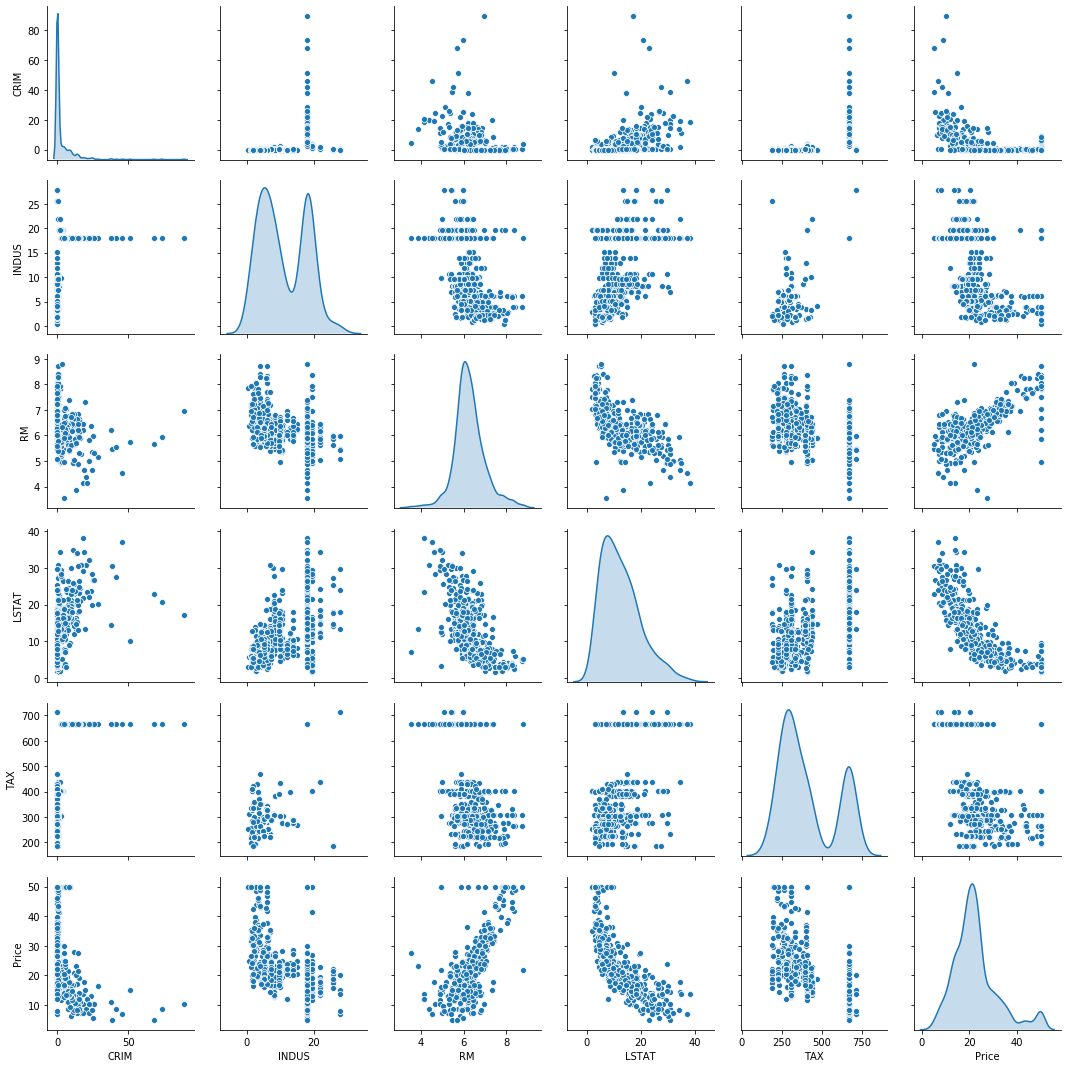

In [4]:
_ = sns.pairplot(boston, vars=['CRIM', 'INDUS', 'RM', 'LSTAT', 'TAX', 'Price'], diag_kind='kde')

Looking at the Kernel Density Estimation (KDE) of the prices, let's get a feel for their elementary statistics.

In [5]:
print('Mean Price:      ${:5.2f}k'.format(boston['Price'].mean()))
print('Median Price:    ${:5.2f}k'.format(np.median(boston['Price'])))
print('Range of Prices: ${:5.2f}k'.format(np.ptp(boston['Price'])))
print('Price StandDev:  ${:5.2f}k'.format(boston['Price'].std()))
print('Price Variance:   {:5.2f}k'.format(boston['Price'].var()))

Mean Price:      $22.53k
Median Price:    $21.20k
Range of Prices: $45.00k
Price StandDev:  $ 9.20k
Price Variance:   84.59k


C:\Users\wwaldron\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Looking at the KDE of the prices above, it is easy to see that the mean and medain prices should be somewhere around \$20k which is what we just measured.

Another statistic that is often convenient to report is the normalized cross correlation coefficeint between features of your data. The correlation coefficeint is defined on a scale from -1 to 1 where 1 measures a highly linear correlation between features, -1 measures a highly *anti*-correlated (linearly) pair of features and 0 measures no correlation between features.

In [6]:
print(np.corrcoef(boston[['CRIM', 'INDUS', 'RM', 'LSTAT', 'TAX', 'Price']], rowvar=False))

[[ 1.          0.40658341 -0.2192467   0.45562148  0.58276431 -0.38830461]
 [ 0.40658341  1.         -0.39167585  0.60379972  0.72076018 -0.48372516]
 [-0.2192467  -0.39167585  1.         -0.61380827 -0.29204783  0.69535995]
 [ 0.45562148  0.60379972 -0.61380827  1.          0.54399341 -0.73766273]
 [ 0.58276431  0.72076018 -0.29204783  0.54399341  1.         -0.46853593]
 [-0.38830461 -0.48372516  0.69535995 -0.73766273 -0.46853593  1.        ]]


From the information above, it appears that the `RM` and `LSTAT` variables are the most highly correlated and anti-correlated variables to the price.

We'll begin with the easier problem to solve. The correlation between the number of rooms and the price. This seems like it is the low hanging fruit considering the relationship looks linear.

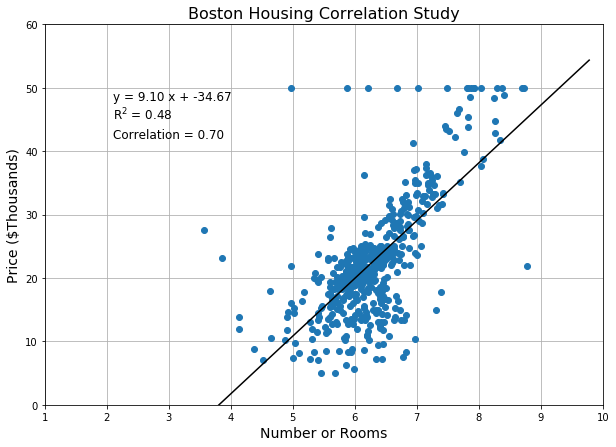

In [7]:
# Fit the Regression
reg = LinearRegression().fit(boston['RM'].values[:, np.newaxis], boston['Price'].values)
r2  = reg.score(boston['RM'].values[:, np.newaxis], boston['Price'].values)

# Plot the Scatter plot
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.scatter(boston['RM'], boston['Price'])

# Plot the Regression Line
xPred = np.linspace(boston['RM'].min() - 1, boston['RM'].max() + 1)[:, np.newaxis]
yPred = reg.coef_ * xPred + reg.intercept_
_ = ax.plot(xPred, yPred, 'k')

# Add Text for Correlation
_ = ax.text(2.1, 48, 'y = {:.2f} x + {:.2f}'.format(reg.coef_[0], reg.intercept_), fontsize=12)
_ = ax.text(2.1, 45, 'R$^2$ = {:.2f}'.format(r2), fontsize=12)
_ = ax.text(2.1, 42, 'Correlation = {:.2f}'.format(np.corrcoef(boston['RM'], boston['Price'])[0, 1]),
            fontsize=12)

# Fix Plot
_ = ax.set_xlabel('Number or Rooms', fontsize=14)
_ = ax.set_ylabel('Price ($Thousands)', fontsize=14)
_ = ax.set_title( 'Boston Housing Correlation Study', fontsize=16)
_ = ax.set_xlim(1, 10)
_ = ax.set_ylim(0, 60)
_ = ax.grid(True)
_ = ax.set_axisbelow(True)

Next, try fitting the `LSTAT` data with a non-linear curve.

In [8]:
# Function for R^2
def r2(x, y, fun):
    """Calculates the Coefficeint of Determination goodness of fit parameter"""
    
    # RSS
    rss = np.sum( (y - fun(x))**2 )
    
    # TSS
    tss = np.sum( (y - y.mean())**2 )
    
    # Return the Goodness of Fit
    return 1 - rss/tss

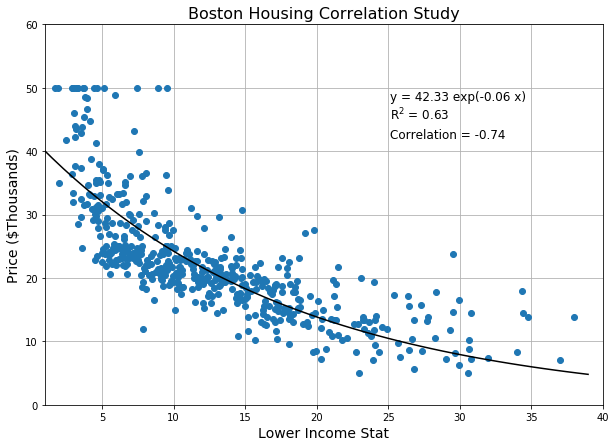

In [9]:
# Let's Try an Exponential Fit First
fun = lambda x, a, b: a*np.exp(-b*x)

# Get the Fit
x = boston['LSTAT']
y = boston['Price']
pOpt, _ = scipy.optimize.curve_fit(fun, x, y, p0=[50, 1])
pOpt = tuple(pOpt)

# Plot the Scatter plot
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.scatter(boston['LSTAT'], boston['Price'])

# Plot the Regression Line
xPred = np.linspace(boston['LSTAT'].min() - 1, boston['LSTAT'].max() + 1)[:, np.newaxis]
yPred = fun(xPred, *pOpt)
_ = ax.plot(xPred, yPred, 'k')

# Add Text for Correlation
_ = ax.text(25.1, 48, 'y = {:.2f} exp(-{:.2f} x)'.format(*pOpt), fontsize=12)
_ = ax.text(25.1, 45, 'R$^2$ = {:.2f}'.format(r2(x, y, lambda x: fun(x, *pOpt))), fontsize=12)
_ = ax.text(25.1, 42, 'Correlation = {:.2f}'.format(np.corrcoef(boston['LSTAT'], boston['Price'])[0, 1]),
            fontsize=12)

# Fix Plot
_ = ax.set_xlabel('Lower Income Stat', fontsize=14)
_ = ax.set_ylabel('Price ($Thousands)', fontsize=14)
_ = ax.set_title( 'Boston Housing Correlation Study', fontsize=16)
_ = ax.set_xlim(1, 40)
_ = ax.set_ylim(0, 60)
_ = ax.grid(True)
_ = ax.set_axisbelow(True)

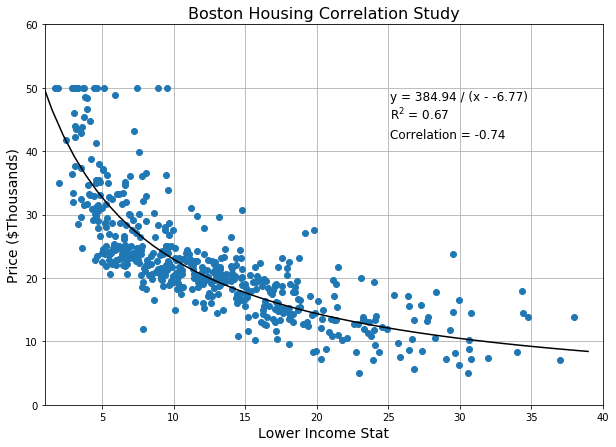

In [10]:
# Let's Try an inverse x
fun = lambda x, a, x0: a/(x - x0)

# Get the Fit
x = boston['LSTAT']
y = boston['Price']
pOpt, _ = scipy.optimize.curve_fit(fun, x, y, p0=[1, 1])
pOpt = tuple(pOpt)

# Plot the Scatter plot
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.scatter(boston['LSTAT'], boston['Price'])

# Plot the Regression Line
xPred = np.linspace(boston['LSTAT'].min() - 1, boston['LSTAT'].max() + 1)[:, np.newaxis]
yPred = fun(xPred, *pOpt)
_ = ax.plot(xPred, yPred, 'k')

# Add Text for Correlation
_ = ax.text(25.1, 48, 'y = {:.2f} / (x - {:.2f})'.format(*pOpt), fontsize=12)
_ = ax.text(25.1, 45, 'R$^2$ = {:.2f}'.format(r2(x, y, lambda x: fun(x, *pOpt))), fontsize=12)
_ = ax.text(25.1, 42, 'Correlation = {:.2f}'.format(np.corrcoef(boston['LSTAT'], boston['Price'])[0, 1]),
            fontsize=12)

# Fix Plot
_ = ax.set_xlabel('Lower Income Stat', fontsize=14)
_ = ax.set_ylabel('Price ($Thousands)', fontsize=14)
_ = ax.set_title( 'Boston Housing Correlation Study', fontsize=16)
_ = ax.set_xlim(1, 40)
_ = ax.set_ylim(0, 60)
_ = ax.grid(True)
_ = ax.set_axisbelow(True)

## Your Turn

Now that we have taken a look at how to do explore the housing data. It's your turn to do that with the diamond data set.

Use the cells below to implement the instructions.

### Pair Plot

Use Seaborn to plot the pairwise feature scatter plots.

### Low Level Statistics

Use the built in functions in Numpy to plot the elementary statistics on the diamond prices.

### Regression Plots

Use the code above (for the housing data) to create a second order ploynomial fit for the diamond price vs. carats.

Use the code above to create an exponential fit for the diamond price vs. carats.